In [1]:
from datetime import date

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.1.1'

# Line

In [3]:
# read aapl stock prices
aapl = pd.read_csv('./datasets/aapl.csv', index_col=['Date'], parse_dates=True) \
    .sort_index(level=['Date'], ascending=True)
aapl

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1984-09-07,26.50,26.87,26.25,26.50,2981600,3.02
1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01
1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
...,...,...,...,...,...,...
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80


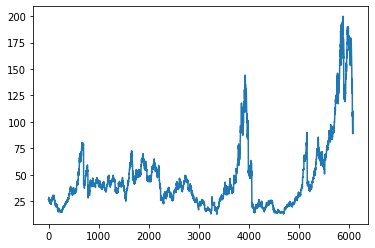

In [4]:
# plots numpy array, where `Xs` are indices and `Ys` are values
plt.plot(aapl['Close'].values)
plt.show()

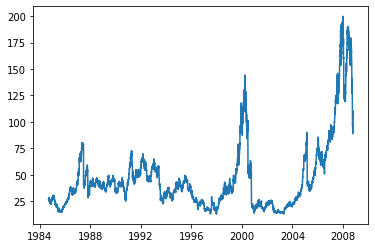

In [5]:
# plots pandas Serias, where `Xs` are indices (in our case indicies are dates) and `Ys` are values
plt.plot(aapl['Close'])
plt.show()

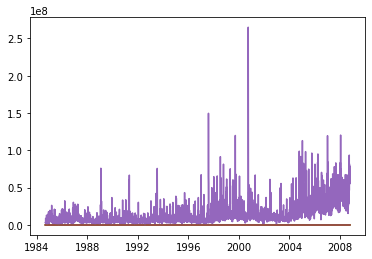

In [6]:
# We can plot all numeric columns of the DataFrame with matplotlib, 
# but because `Volume` column contains values that are bigger 
# in magnitude, you won't see other columns.
plt.plot(aapl)
plt.show()

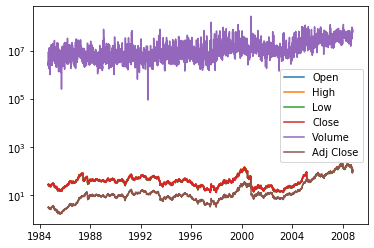

In [7]:
plt.plot(aapl)
plt.yscale('log')
plt.legend(aapl.columns)
plt.show()

1. Build a graphic that shows Stock prices from 2000 to 2004 years,
2. cut off prices bigger then 100

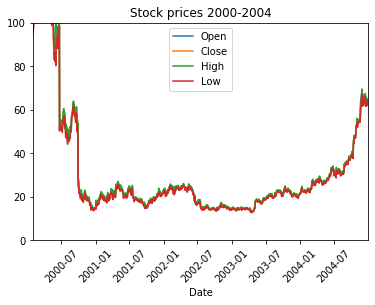

In [8]:
columns_to_display = ['Open', 'Close', 'High', 'Low']
plt.plot(aapl[columns_to_display])
plt.title('Stock prices 2000-2004')
plt.legend(columns_to_display)
plt.xlabel(aapl.index.name)
plt.axis(
    (date(year=2000, month=1, day=31), date(year=2004, month=12, day=31), # x-min and x-max
     0, 100) # y-min and y-max
)
plt.xticks(rotation=45)
plt.show()

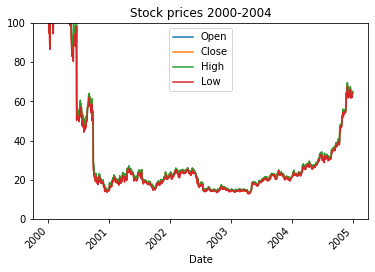

In [9]:
# You can do better with pandas plot
ax = aapl.loc['2000':'2004', ['Open', 'Close', 'High', 'Low']] \
    .plot(kind='line', rot=45, title='Stock prices 2000-2004')
ax.set_ylim((0, 100))
# plt.axis(
#     (date(year=2000, month=1, day=31), date(year=2004, month=12, day=31), # x-min and x-max
#      0, 100) # y-min and y-max
# )
plt.show()

### Using index or specifying `X` and `Y` yourself

##### working with categorical variables

In [10]:
stock = pd.read_csv('./datasets/stock_aapl_goog_ibm.csv', delimiter=' ', parse_dates=True)

# if you want to sort by month, you should make that column categorial values.
# values - list of categories
# ordered - if the categories are ordered
# categories- list of categories in order you want to have
stock['Month'] = pd.Categorical(values=stock['Month'], ordered=True, categories=['Jan', 'Feb', 'Mar', 
                                                                                'Apr', 'May', 'Jun',
                                                                                'Jul', 'Aug', 'Sep',
                                                                                'Oct', 'Nov', 'Dec'])
stock.sort_values('Month', ascending=True)

,Month,AAPL,GOOG,IBM
0,Jan,117.160004,534.522445,153.309998
1,Feb,128.460007,558.402511,161.940002
2,Mar,124.430000,548.002468,160.500000
3,Apr,125.150002,537.340027,171.289993
4,May,130.279999,532.109985,169.649994
5,Jun,125.430000,520.510010,162.660004
6,Jul,121.300003,625.609985,161.990005
7,Aug,112.760002,618.250000,147.889999
8,Sep,110.300003,608.419983,144.970001
9,Oct,119.500000,710.809998,140.080002


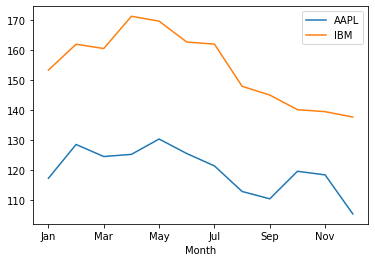

In [11]:
# Explicitly specifying arguments
stock.plot(x='Month', y=['AAPL', 'IBM'])
plt.show()

In [12]:
# Using index
stock = stock.set_index('Month')
stock

,AAPL,GOOG,IBM
Month,,,
Jan,117.160004,534.522445,153.309998
Feb,128.460007,558.402511,161.940002
Mar,124.430000,548.002468,160.500000
Apr,125.150002,537.340027,171.289993
May,130.279999,532.109985,169.649994
Jun,125.430000,520.510010,162.660004
Jul,121.300003,625.609985,161.990005
Aug,112.760002,618.250000,147.889999
Sep,110.300003,608.419983,144.970001


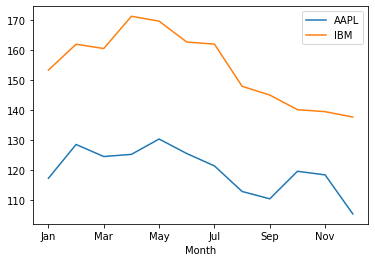

In [13]:
stock.loc[:, ['AAPL', 'IBM']].plot()
plt.show()

# Hist

In [14]:
iris = pd.read_csv('./datasets/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


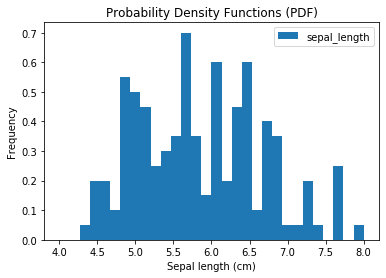

In [15]:
# range - extema of bins (min, max)
# density - normilizes values
iris.plot(kind='hist', y='sepal_length', bins=30, range=(4, 8), density=True)
plt.title('Probability Density Functions (PDF)')
plt.xlabel('Sepal length (cm)')
plt.show()

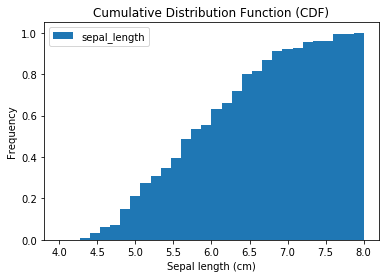

In [16]:
iris.plot(kind='hist', y='sepal_length', bins=30, range=(4, 8), density=True, cumulative=True)
plt.xlabel('Sepal length (cm)')
plt.title('Cumulative Distribution Function (CDF)')
plt.show()

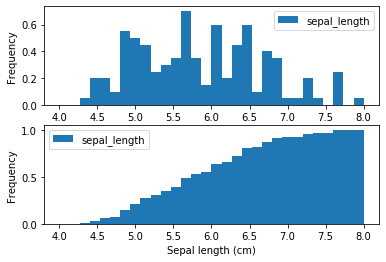

In [17]:
# You can do better with subplots
fig, axes = plt.subplots(nrows=2, ncols=1)
iris.plot(ax=axes[0], kind='hist', y='sepal_length', bins=30, range=(4, 8), density=True)

iris.plot(ax=axes[1], kind='hist', y='sepal_length', bins=30, range=(4, 8), density=True, cumulative=True)
plt.xlabel('Sepal length (cm)')
plt.show()

# Scatter

In [18]:
auto_mpg = pd.read_csv('./datasets/auto_miles_per_galon.csv')
auto_mpg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger


Unlike `line` plot, you always have to specify `x` and `y`.

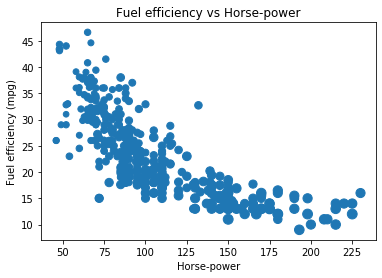

In [19]:
normiled_weights = auto_mpg['weight'] / auto_mpg['weight'].max() * 100

# s - size of each dot
auto_mpg.plot(kind='scatter', x='hp', y='mpg', s=normiled_weights)
plt.title('Fuel efficiency vs Horse-power')
plt.xlabel('Horse-power')
plt.ylabel('Fuel efficiency (mpg)')
plt.show()

# Box

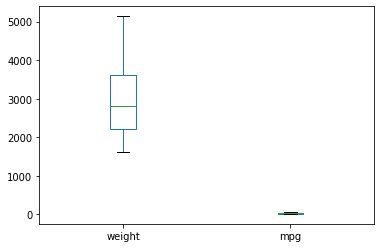

In [20]:
# 'weight' column has way bigger magnitude then 'mpg' column, so it's a bad idea to plot them together
auto_mpg[['weight', 'mpg']].plot(kind='box')
plt.show()

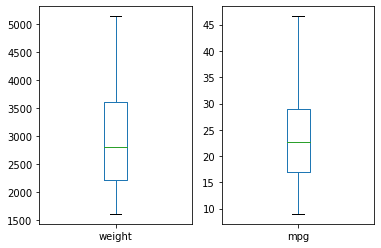

In [21]:
# Use subplots argument
auto_mpg[['weight', 'mpg']].plot(kind='box', subplots=True)
plt.show()

## Plot styles
Style format string:
1. color - `k` (stands for black)
2. marker - `.` (stands for dot)
3. line type - `-` (solid line)

Other style combinations
![styles](./styles.png)

In [22]:
aapl = pd.read_csv('datasets/aapl.csv', parse_dates=['Date'], index_col=['Date']) \
    .sort_index(level=['Date'], ascending=True)
aapl

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1984-09-07,26.50,26.87,26.25,26.50,2981600,3.02
1984-09-10,26.50,26.62,25.87,26.37,2346400,3.01
1984-09-11,26.62,27.37,26.62,26.87,5444000,3.07
1984-09-12,26.87,27.00,26.12,26.12,4773600,2.98
1984-09-13,27.50,27.62,27.50,27.50,7429600,3.14
...,...,...,...,...,...,...
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80


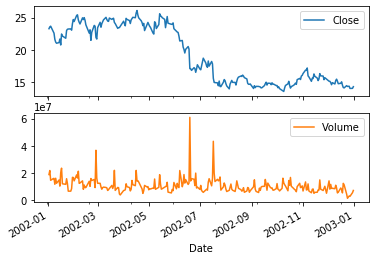

In [23]:
aapl.loc['2002', ['Close', 'Volume']].plot(subplots=True)
plt.show()

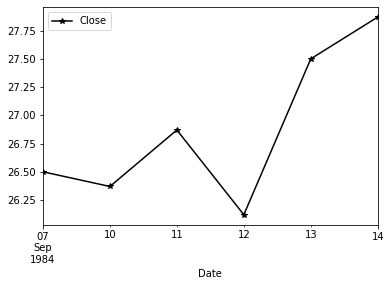

In [24]:
aapl.loc['1984-09-07':'1984-09-14', ['Close']].plot(style='k*-')
plt.show()